### Q4. 大津二值化算法
大津算法来二值化图像
大津算法，也被称作最大类间方差法，是一种可以自动确定二值化中阈值的算法
从类内方差和类间方差的比值计算得来：
1. 先计算图像的直方图，即将图像所有的像素点按照0~255共256个bin，统计落在每个bin的像素点数量，这个很简单啦
2. 归一化直方图，也即将每个bin中像素点数量除以总的像素点，使其限制在0~1之间
3. 在这里设置一个分类的阈值ii，也即一个灰度级，开始从0迭代
4. 通过归一化的直方图，统计0-i 灰度级的像素(假设像素值在此范围的像素叫做前景像素) 所占整幅图像的比例$w_0$，并统计前景像素的平均灰度$u_0$；统计i-255灰度级的像素(假设像素值在此范围的像素叫做背景像素) 所占整幅图像的比例$w_1$，并统计背景像素的平均灰度$u_1$；在这里，设图像的总平均灰度为$u_2$，类间方差记为$g$。
其中：
$$u_{2}=\omega_{0} * u_{0}+\omega_{1} * u_{1}$$
$$g=\omega_{0}\left(u_{0}-\mu_{2}\right)^{2}+\omega_{1}\left(u_{1}-u_{2}\right)^{2}$$
将$u_2$代入g中，可得：
$$g=\omega_{0} \omega_{1}\left(u_{0}-u_{1}\right)^{2}$$

5. ++i,阈值的灰度值加1，并转到第4个步骤，直到i为256时结束迭代
6. 将最大g相应的i值作为图像的全局阈值

[参考CSDN](https://blog.csdn.net/qq_29462849/article/details/81022607)

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

[[ 80  55  53 ... 113  87 123]
 [ 88  65  56 ... 140 136 108]
 [ 85  78  69 ... 157 178 103]
 ...
 [172  97 108 ...  55  58  56]
 [197 114 117 ...  77  58  56]
 [153 129 125 ... 117  96  66]] 
shape (128, 128)


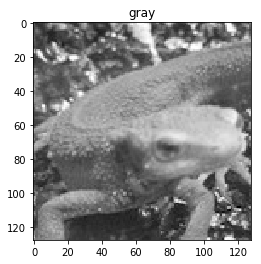

In [2]:
# read image
img = cv2.imread("gg.jpg")
H, W, C = img.shape

# Grayscale
img_gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]

# 将图像像素转变为0-255之间
img_gray = img_gray.astype(np.uint8)

plt.figure()
plt.imshow(img_gray, cmap='gray')
plt.title("gray")
print(img_gray,
     "\nshape", img_gray.shape)

In [5]:
# Determine threshold of Otsu's binarization
pixel_sum = img_gray.shape[0] * img_gray.shape[1]
max_sigma = 1
max_t = 1

for t in range(1, 256):
    img_under_t = img_gray[np.where(img_gray<t)]
    w_0 = img_under_t.shape[0] / pixel_sum
    u_0 = np.mean(img_under_t)

    img_upper_t = img_gray[np.where(img_gray>t)]
    w_1 = img_upper_t.shape[0] / pixel_sum
    u_1 = np.mean(img_upper_t)
    sigma = w_0 * w_1 * ((u_0 - u_1)**2)
    if sigma  > max_sigma:
        max_sigma  = sigma 
        max_t = t
print(max_sigma, t)

16253.875835146755 255


### np.where()
1. np.where(condition, x, y)

满足条件(condition)，输出x，不满足输出y
2. np.where(condition)

只有条件 (condition)，没有x和y，则输出满足条件 (即非0) 元素的坐标 (等价于numpy.nonzero)。这里的坐标以tuple的形式给出，通常原数组有多少维，输出的tuple中就包含几个数组，分别对应符合条件元素的各维坐标。

```
img_gray[np.where(img_gray<t)] 
等价于
img_gray[img_gray<t]
```


Text(0.5, 1.0, " Otsu'sMethod gray")

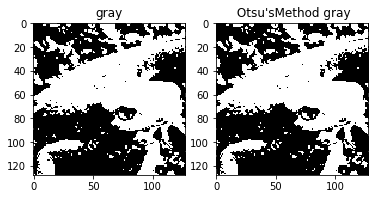

In [6]:
# Binarization
th = max_t
plt.figure()
plt.subplot(121)
plt.imshow(img_gray, cmap='gray')
plt.title("gray")

img_gray[img_gray < th] = 0
img_gray[img_gray >= th] = 255

plt.subplot(122)
plt.imshow(img_gray, cmap='gray')
plt.title(" Otsu'sMethod gray")